CNN에서는 좀 더 flexible한 모델을 만들기 위해서, non-linear function과 함께 추가적인 layer를 쌓아주었다.

RNN에서는 어떻게 진행해야 하는가? 우선 '어떻게' '어디에' 추가적인 비선형성을 넣어야 할지 먼저 고려해보자.


우선, RNN block위에 단순히 겹쳐 쌓는 방법이 있다. 이를 통해서 flexible mechanism을 구현할 수 있다. stack level에 따라 다른 정보를 함유하고 있는 경우가 있는데, 예를 들면 financial marcket에의 적용이 되겠다.

high level에서는 (bear or bull)을 확인하고, low level에서는 더 짧은 기간에서의 순간적인 주가의 움직임을 확인하고 싶어한다.


다음 그림은 L개의 hidden layer를 갖고 있는 모델의 이미지이다. 
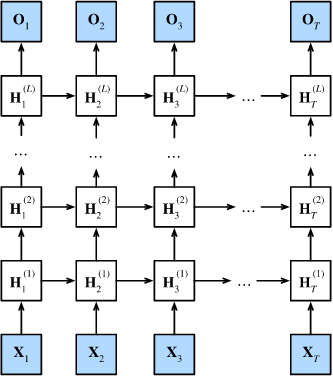

# 9.3.1. Functional Dependencies


\begin{split}\begin{aligned}
\mathbf{H}_t^{(l)} = \phi_l(\mathbf{H}_t^{(l-1)} \mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)} \mathbf{W}_{hh}^{(l)}  + \mathbf{b}_h^{(l)}),
\end{aligned}\end{split}

\begin{split}\begin{aligned}
\mathbf{O}_t = \mathbf{H}_t^{(L)} \mathbf{W}_{hq} + \mathbf{b}_q,
\end{aligned}\end{split}

최종 output은 결국, L 번째 hidden state에 의해서만 결정된다.

# 9.3.2. Concise Implementation

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

time traveller thingst rich and the mannet of this nent grach th


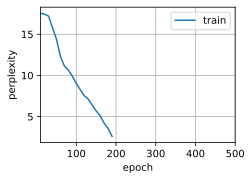

In [ ]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)